In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
darknet_data = pd.read_csv('./Darknet.csv')

In [ ]:
darknet_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [ ]:
def features_with_bad_samples():
  """
  A Function that will scan the DarkNet DataSet for features with Inf, NaN, or Zero values.
  """
  invalid_values = [np.inf, np.nan, "Infinity", 'inf', 'NaN', 'nan', 0]
  infs           = [np.inf, 'Infinity', 'inf']
  NaNs           = [np.nan, 'NaN', 'nan']

  stats = {
      'Dataset': ['DarkNet Data', 'DarkNet Data', 'DarknET Data'], 
      'Value': ['Inf', 'NaN', 'Zero']
  }
  
  index_ = 0
  for col in darknet_data.columns:
      
      index_ += 1
      feature = np.zeros(3)

      for value in invalid_values:
        if value in infs:
          invalid_value_index = 0
        elif value in NaNs:
          invalid_value_index = 1
        else: 
          invalid_value_index = 2  
        indexNames = darknet_data[darknet_data[col] == value].index
        if not indexNames.empty:
          feature[invalid_value_index] += len(indexNames)

      stats[col] = feature         
  return pd.DataFrame(stats)


In [ ]:
features_with_bad_samples()

,Dataset,Value,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,DarkNet Data,Inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DarkNet Data,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DarknET Data,Zero,0.0,0.0,799.0,0.0,799.0,799.0,0.0,49.0,...,141530.0,141530.0,141530.0,141530.0,68218.0,80077.0,68218.0,68218.0,0.0,0.0


In [ ]:
def Clean_data(invalid_values_list):
   
   for col in invalid_values_list:
     if col in darknet_data.columns:
       darknet_data.drop(columns=[col], inplace=True)


   #Drop missing vals/NaNs...
   darknet_data.dropna(inplace=True)

   #Search for any Inf, NaN values 
   invalid_values = [np.inf, np.nan, 'Infinity', 'inf', 'NaN', 'nan']

   for col in darknet_data.columns:
     for value in invalid_values:
       indexNames = darknet_data[darknet_data[col] == value].index
       if not indexNames.empty:
         darknet_data.drop(indexNames, inplace=True)

   return darknet_data     

In [ ]:
darknet = Clean_data([np.inf, np.nan, 'Infinity', 'inf', 'NaN', 'nan'])

In [ ]:
darknet_data.isna().sum().sort_index(ascending=False)

URG Flag Count                0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Total Fwd Packet              0
Total Bwd packets             0
                             ..
Active Std                    0
Active Min                    0
Active Mean                   0
Active Max                    0
ACK Flag Count                0
Length: 85, dtype: int64

In [ ]:
import pandas as pd

def clean_duplicate_data(df):

    # Drop duplicate rows
    df = df.drop_duplicates()
    return df

darknet_data = clean_duplicate_data(darknet_data)

In [ ]:
def rename_columns(columns, new_names): 

    for index, col in enumerate(columns):
      darknet_data.rename(columns = {
          col: new_names[index]
          },inplace = True)
    return darknet_data

In [ ]:
darknet_data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [ ]:
darknet_data = rename_columns(['Label', 'Label.1'], ['Traffic Type', 'Application Type'])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
def get_columns_with_high_zero_percentage(data, threshold):
    """
    Returns a list of column names in a pandas DataFrame for which the
    percentage of zero values is greater than the given threshold.
    
    Parameters
    ----------
    data : pandas.DataFrame
        The input DataFrame to check for zero values.
    threshold : float
        The threshold percentage for the number of zero values.
        
    Returns
    -------
    list
        A list of column names for which the percentage of zero values
        is greater than the threshold.
    """
    zero_percents = (data == 0).mean() * 100
    high_zero_cols = zero_percents[zero_percents > threshold].index.tolist()
    return high_zero_cols


In [ ]:
get_columns_with_high_zero_percentage(darknet_data, darknet_data.shape[1] - 1)

['Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'RST Flag Count',
 'URG Flag Count',
 'CWE Flag Count',
 'ECE Flag Count',
 'Fwd Bytes/Bulk Avg',
 'Fwd Packet/Bulk Avg',
 'Fwd Bulk Rate Avg',
 'Bwd Bytes/Bulk Avg',
 'Subflow Bwd Packets',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min']

In [ ]:
def eliminate_cols_from_dataSset(data, cols_to_eliminate):
  for col in cols_to_eliminate:
    data = data.drop([col], axis=1)

  return data   

In [ ]:
cols_to_eliminate = [
    'Flow ID',
    'Timestamp',
]

darknet_data = eliminate_cols_from_dataSset(darknet_data, cols_to_eliminate)

In [ ]:
darknet_data

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Traffic Type,Application Type
0,10.152.152.11,57158,216.58.220.99,443,6,229,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11,57159,216.58.220.99,443,6,407,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11,57160,216.58.220.99,443,6,431,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11,49134,74.125.136.120,443,6,359,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11,34697,173.194.65.127,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246,55219,224.0.0.252,5355,17,411806,2,0,44,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246,64207,224.0.0.252,5355,17,411574,2,0,44,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246,61115,224.0.0.252,5355,17,422299,2,0,44,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246,64790,224.0.0.252,5355,17,411855,2,0,44,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [ ]:
zeros_cols = get_columns_with_high_zero_percentage(darknet_data, darknet_data.shape[1] - 1)

In [ ]:
darknet_data = eliminate_cols_from_dataSset(darknet_data, zeros_cols)

In [ ]:
import pandas as pd
import socket
import struct

def ip_to_decimal(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: struct.unpack("!I", socket.inet_aton(x))[0])
    return df


In [ ]:
ip_cols = ['Src IP', 'Dst IP']
darknet_data = ip_to_decimal(darknet_data, ip_cols)

In [ ]:
darknet_data

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Traffic Type,Application Type
0,177772555,57158,3627736163,443,6,229,1,1,0,0,...,1892,1047,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,177772555,57159,3627736163,443,6,407,1,1,0,0,...,1987,1047,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,177772555,57160,3627736163,443,6,431,1,1,0,0,...,2049,1047,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,177772555,49134,1249740920,443,6,359,1,1,0,0,...,2008,1047,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,177772555,34697,2915189119,19305,6,10778451,591,400,64530,6659,...,1382,2320,581,20,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,168298742,55219,3758096636,5355,17,411806,2,0,44,0,...,0,0,1,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,168298742,64207,3758096636,5355,17,411574,2,0,44,0,...,0,0,1,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,168298742,61115,3758096636,5355,17,422299,2,0,44,0,...,0,0,1,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,168298742,64790,3758096636,5355,17,411855,2,0,44,0,...,0,0,1,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


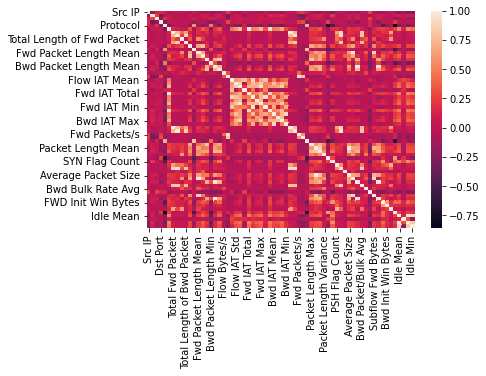

In [ ]:
sns.heatmap(darknet_data.corr())

In [ ]:
cat_cols = darknet_data.select_dtypes('object').columns
cat_cols

Index(['Traffic Type', 'Application Type'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_application_type(dataset, column_name):
    # Convert the column names to lowercase
    dataset[column_name] = dataset[column_name].apply(lambda x: x.lower())
    
    # Use LabelEncoder to encode the values
    label_encoder = LabelEncoder()
    dataset[column_name] = label_encoder.fit_transform(dataset[column_name])
    
    return dataset


In [ ]:
darknet_data = encode_application_type(darknet_data, 'Application Type')

In [ ]:
darknet_data['Application Type'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
# Load the dataset into a pandas DataFrame
df = darknet_data

# Select the categorical columns
cat_cols = ['Traffic Type']

# Encode the categorical columns using label encoding
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
corr_matrix = darknet_data.corr()
target_corr = corr_matrix['Traffic Type'].abs().sort_values(ascending=False)

In [ ]:
target_corr

Traffic Type                  1.000000
Bwd Packet Length Min         0.574353
Protocol                      0.400694
FIN Flag Count                0.351808
Dst IP                        0.330925
                                ...   
Fwd IAT Min                   0.007971
Total Length of Bwd Packet    0.007795
Down/Up Ratio                 0.006743
Bwd IAT Min                   0.005154
Packet Length Variance        0.005080
Name: Traffic Type, Length: 66, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def Search_for_corr_thershold(df, threshold_list):
    # Split the dataset into training and test sets
    X = df.drop(['Traffic Type', 'Application Type'], axis=1)
    y = df[['Traffic Type']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Compute the correlation matrix
    corr_matrix = X_train.corr()

    # Evaluate different thresholds using logistic regression and F1 score
    best_f1 = 0
    best_threshold = 0
    for threshold in threshold_list:
        # Select the features with a correlation coefficient above the threshold
        selected_features = []
        for i in range(len(corr_matrix.columns)):
            if (abs(corr_matrix.iloc[i].values) > threshold).any():
                selected_features.append(corr_matrix.columns[i])
        
        # Train a logistic regression model on the selected features
        lr = RandomForestClassifier()
        lr.fit(X_train[selected_features], y_train)
        
        # Evaluate the model on the test set
        y_pred = lr.predict(X_test[selected_features])
        f1 = f1_score(y_test, y_pred, average='macro')
        
        # Update the best threshold and F1 score
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    # Print the best threshold and F1 score
    print("Best threshold:", best_threshold)
    print("Best F1 score:", best_f1)
    return selected_features


In [ ]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
Search_for_corr_thershold(darknet_data, thresholds)

<ipython-input-96-02f2c1e2aeed>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(X_train[selected_features], y_train)
<ipython-input-96-02f2c1e2aeed>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(X_train[selected_features], y_train)
<ipython-input-96-02f2c1e2aeed>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(X_train[selected_features], y_train)
<ipython-input-96-02f2c1e2aeed>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(X_train[selected_features], y_train)
<ipython-input-96-02f2c1e2aeed>:26: DataConversionWa

Best threshold: 0.1
Best F1 score: 0.9856291217836723


['Src IP',
 'Src Port',
 'Dst IP',
 'Dst Port',
 'Protocol',
 'Flow Duration',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'Down/Up Ratio',
 'Average Packet Size',
 'Fwd Segment Size Av

In [ ]:
def select_features_with_target_corr(df, target_col, threshold):
    # Compute the correlation matrix with the target feature
    corr_matrix = df.corr()[target_col].drop(target_col)
    
    # Select the features with a correlation coefficient above the threshold
    selected_features = corr_matrix[abs(corr_matrix) >= threshold].index.tolist()
    
    return selected_features

In [ ]:
select_features_with_target_corr(darknet_data, 'Traffic Type', 0.2)

['Dst IP',
 'Dst Port',
 'Protocol',
 'Fwd Packet Length Min',
 'Bwd Packet Length Min',
 'Packet Length Min',
 'FIN Flag Count',
 'SYN Flag Count',
 'Idle Mean',
 'Idle Max',
 'Idle Min',
 'Application Type']

**We cannot just use the correlation technique because it just capture the linear relationship in other it cannot capture the non-linear relationship which gonna exclude some features even if they have an effect on the target value(a non linear effect) for that we are gonne use a method called *Mutual information*** 

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Load the dataset
df = darknet_data.copy()

# Select the columns containing IP addresses
ip_cols = [col for col in df.columns if 'ip' in col]

# Drop the columns containing IP addresses
df = df.drop(ip_cols, axis=1)

# Compute the mutual information
mi = mutual_info_classif(df.drop(['Application Type'], axis=1), df['Traffic Type'])

# Get the feature names
feature_names = df.drop(['Traffic Type', 'Application Type'], axis=1).columns.tolist()
# Print the feature names and their mutual information scores
for i in range(len(feature_names)):
  if mi[i] > 0.5 and feature_names[i] :
    print(f"{i} : {feature_names[i]}: {mi[i]}")


0 : Src IP: 0.9605739011715015
2 : Dst IP: 0.8157421529827715
39 : Packet Length Max: 0.5410435201065245
40 : Packet Length Mean: 0.5393832236448453
48 : Average Packet Size: 0.5315039516271534


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import numpy as np

X = darknet_data.drop(['Traffic Type', 'Application Type'], axis = 1)
y = darknet_data['Traffic Type']
X = np.abs(X)

# X is your feature matrix, y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a range of k values to test
ks = np.arange(1, X.shape[1]+1)

# Initialize variables to keep track of best k and its corresponding score
best_k = 0
best_score = 0

# Test each k value and keep track of the one that yields the best score
for k in ks:
    # Select top k features using chi-squared test
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train, y_train)
    
    # Train and evaluate a model using the selected features
    model = RandomForestClassifier()
    model.fit(selector.transform(X_train), y_train)
    score = model.score(selector.transform(X_test), y_test)
    
    # Keep track of best k and its score
    if score > best_score:
        best_k = k
        best_score = score

# Print best k and its score
print("Best k: {}".format(best_k))
print("Best score: {:.2f}".format(best_score))


In [ ]:
darknet_data['Traffic Type'].value_counts()

In [ ]:
def select_features_corr(df, threshold):
    # calculate correlation matrix
    corr_matrix = df.corr().abs()
    
    # create a boolean mask to identify correlated features
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # drop correlated features
    df_selected = df.drop(to_drop, axis=1)
    
    # return list of selected features
    return df_selected.columns.tolist()


In [ ]:
select_features_corr(darknet_data, 0.5)

<ipython-input-102-ea1f5c1bd73e>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['Src IP',
 'Src Port',
 'Dst IP',
 'Dst Port',
 'Protocol',
 'Flow Duration',
 'Total Fwd Packet',
 'Total Length of Fwd Packet',
 'Fwd Packet Length Max',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'SYN Flag Count',
 'Down/Up Ratio',
 'Bwd Bulk Rate Avg',
 'Subflow Fwd Packets',
 'Idle Std',
 'Application Type']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

def select_features(data, target_col, k=15, thresh=0.5, n_estimators=100, degree=2, random_state=42):
    """
    Selects the most important features using multiple feature selection approaches.
    
    Parameters:
    data (pandas DataFrame): the input data
    target_col (str): the name of the target column
    k (int): number of top features to select using SelectKBest
    thresh (float): threshold value for correlation matrix
    n_estimators (int): number of trees in RandomForestClassifier
    degree (int): degree of polynomial features
    random_state (int): random seed for reproducibility
    
    Returns:
    selected_features (list): a list of the most important features
    """
        
    # Balance the data using SMOTE
    X = data.drop([target_col, 'Application Type'], axis=1)
    y = data[target_col]
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Add polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_resampled)
    
    # Correlation matrix
    corr_matrix = pd.DataFrame(X_poly).corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    drop_cols = [column for column in upper.columns if any(upper[column] > thresh)]
    X_poly = np.delete(X_poly, drop_cols, axis=1)
    
    # SelectKBest
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X_poly, y_resampled)
    top_k_features = selector.get_support(indices=True)
    top_k_feature_names = X.columns[top_k_features].tolist()
    
    # RandomForestClassifier feature importance
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(X_poly, y_resampled)
    rf_feature_importances = rf_model.feature_importances_
    rf_top_features = np.argsort(rf_feature_importances)[::-1][:k]
    rf_top_feature_names = X.columns[rf_top_features].tolist()
    
    # Combine selected features from all methods
    selected_features = list(set(top_k_feature_names + rf_top_feature_names))
    
    return selected_features


In [ ]:
selected_features = select_features(darknet_data, 'Traffic Type')

<ipython-input-104-83040fddb488>:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 29 33 46 51 54 55 67 68 71 72 73 74 75 85 86 88 89] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
selected_features

['Flow Duration',
 'Total Length of Fwd Packet',
 'Bwd Packet Length Mean',
 'SYN Flag Count',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Flow IAT Mean',
 'Flow Packets/s',
 'Bwd Packet Length Max',
 'Flow Bytes/s',
 'Src Port',
 'Fwd Act Data Pkts',
 'Dst Port',
 'Fwd Seg Size Min',
 'Fwd IAT Min',
 'Fwd IAT Mean',
 'Protocol',
 'Total Fwd Packet',
 'Fwd Packet Length Max',
 'Bwd IAT Max',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Std',
 'Total Bwd packets',
 'Bwd Packets/s']

After performing the SelectKbet , correlation and the RF feature importance also including the Polynomial Features to capture the non-linear relationships, the next step in the process is to generate symentic Data using SMOTE, GANs and the VAE techniques.

# SMOTE , GAN and VAE

In [ ]:
from imblearn.over_sampling import SMOTE 

def perform_smote(df, random_state=42, target_col='Traffic Type'):

  X = df.drop([target_col], axis=1)
  y = df[target_col]
  smote = SMOTE(random_state = random_state)
  X_resampled, y_resampled = smote.fit_resample(X, y)

  resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns = [target_col])], axis=1)
  
  return resampled_data


In [ ]:
darknet_data_smote = perform_smote(darknet_data)

In [ ]:
darknet_data_smote.shape 

(276260, 66)

In [ ]:
X = df.drop(['Traffic Type'], axis=1)
y = df['Traffic Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_data = pd.concat([X_test,y_test],axis=1)

In [ ]:
test_data = test_data.loc[:, selected_features + ['Traffic Type']]

In [ ]:
from collections import Counter
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE

def oversample_data(X_train, y_train):
  
    print("Distribution of target variable before oversampling:")
    print(Counter(y_train))
    
    # Define oversampling techniques to use
    oversamplers = [
        RandomOverSampler(sampling_strategy='minority'),
        SMOTE(sampling_strategy='not majority'),
        ADASYN(sampling_strategy='minority')
    ]
    
    X_resampled = []
    y_resampled = []
    
    # Apply each oversampling technique and store the resampled data
    for oversampler in oversamplers:
        X_res, y_res = oversampler.fit_resample(X_train, y_train)
        X_resampled.append(X_res)
        y_resampled.append(y_res)
    
    # Print the distribution of the target variable after oversampling
    print("\nDistribution of target variable after oversampling:")
    for i, y_res in enumerate(y_resampled):
        print(f"\nOversampler {i}:")
        print(Counter(y_res))
    
    return X_resampled, y_resampled


In [ ]:
new_data = oversample_data(darknet_data.drop(['Traffic Type'], axis=1), darknet_data['Traffic Type'])

Distribution of target variable before oversampling:
Counter({0: 69065, 1: 23861, 3: 22919, 2: 1179})

Distribution of target variable after oversampling:

Oversampler 0:
Counter({0: 69065, 2: 69065, 1: 23861, 3: 22919})

Oversampler 1:
Counter({0: 69065, 1: 69065, 2: 69065, 3: 69065})

Oversampler 2:
Counter({2: 69188, 0: 69065, 1: 23861, 3: 22919})


In [ ]:
darknet_data_smote = darknet_data_smote.loc[:, selected_features + ['Traffic Type']]

In [ ]:
X_train = darknet_data_smote.drop(['Traffic Type'], axis=1)
y_train = darknet_data_smote['Traffic Type']
X_test = test_data.drop(['Traffic Type'], axis=1)
y_test = test_data['Traffic Type']

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

print('train score: ', RF_model.score(X_train, y_train))
print('test score: ', RF_model.score(X_test, y_test))

train score:  0.9999710417722435
test score:  0.9999572740867336


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13921
           1       1.00      1.00      1.00      4721
           2       1.00      1.00      1.00       223
           3       1.00      1.00      1.00      4540

    accuracy                           1.00     23405
   macro avg       1.00      1.00      1.00     23405
weighted avg       1.00      1.00      1.00     23405



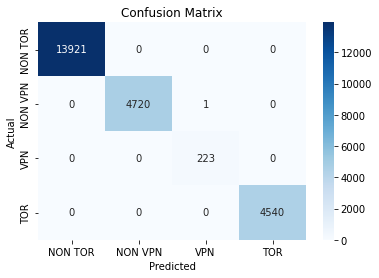

In [ ]:
cm = confusion_matrix(y_test, y_pred)

labels = ["NON TOR","NON VPN","VPN","TOR"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
